用newton's method作为计算方法来做逻辑回归

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df_X = pd.read_csv('./data/logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('./data/logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

In [39]:
print(type(df_X))

<class 'pandas.core.frame.DataFrame'>


df_X 加了一列分类的情况

In [40]:
df_X['label'] = ys[0].values

初始数据的情况画出来看看；用这个pandas的api
DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)


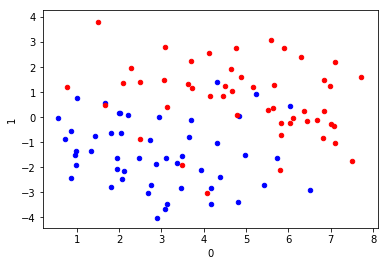

In [41]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

newton's method 1维的计算方法是$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$
但是这里是2维的，因此得用Hessian matrix
$$\begin{align*}
\theta &:= \theta - \frac{\partial J(\theta) / \partial \theta} {H} \\
       &:= \theta - \frac{\nabla_{\theta} J(\theta)} {H} \\
       &:= \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}$$


具体计算公式如下：
$$z^{(k)} = y^{(k)} \theta^T x^{(k)}$$
$$g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$$
$$\frac{\partial J}{\partial \theta_i} 
 = \frac{1}{m} \sum_{k=1}^{m} \big(g(z^{(k)}) - 1\big) y^{(k)} x_i^{(k)}$$
$$H_{ij} = \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})\big(1 - g(z^{(k)})\big) x_i^{(k)} x_j^{(k)}$$

加一列全为1的，给theta[0]，也就是mx+b的b

In [42]:
Xs = df_X[[0, 1]].values
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
Xs.shape

(99, 3)

In [43]:
ys = df_X['label'].values
ys.shape

(99,)

In [44]:
all_thetas = [] 
theta = np.zeros(Xs.shape[1]) #这里是3维列向量
tol = 1e9
n_iters = 0
theta.shape

(3,)

In [45]:
while tol > 1e-6:
    zs = ys * Xs.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    nabla = np.mean((gzs - 1) * ys * Xs.T, axis=1) #按列来求平均 nabla是3*1列向量
    
    # 这里的计算都是按列来的，不用繁琐的循环
    hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:,i] * Xs[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(nabla)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(n_iters))

SyntaxError: invalid syntax (<ipython-input-45-1648e3278a6f>, line 4)

In [ ]:
print(np.min(Xs[:,1]),np.max(Xs[:,1]))
_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
_xs

In [ ]:
all_thetas

In [ ]:
ax = plt.axes()
df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

for k, theta in enumerate(all_thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")